# Lösungen 6

In [41]:
from math import *
import numpy as np
from matplotlib import pyplot as plt

## Aufgabe 1
### c)
Aus notebook05.ipynb übernommen:

In [5]:
def bisection(f, a, b, tol, termination_criterion='x', print_info=False):

    #check if a or b is an exact zero
    if f(a) == 0:
        return a
    elif f(b) == 0:
        return b

    if f(a)*f(b) > 0:
        raise Exception('f(a) and f(b) must have opposite signs')

    def check_termination_criterion(x, a, b, tol):
        if termination_criterion == 'x':
            return abs(b - a) < tol
        elif termination_criterion == 'y':
            return abs(f(x)) < tol
        else:
            raise Exception('Unknown termination criterion: {}'.format(termination_criterion))

    x = .5*(a + b)
    k = 0
    terminate = check_termination_criterion(x, a, b, tol)
    while not terminate:
        if f(x) == 0: #found exact zero
            break
        elif f(a)*f(x) > 0:
            a = x
        else:
            b = x
        x = .5*(a + b)
        k += 1
        if print_info:
            print('k = {:2d}, a = {:15.8e}, b = {:15.8e}, x = {:15.8e}, f(x) = {:15.8e}'.format(k, a, b, x, f(x)))
        terminate = check_termination_criterion(x, a, b, tol)

    if print_info:
        print('terminated after {} iterations'.format(k))
        print('x = {}, f(x) = {}'.format(x, f(x)))
    return x

In [16]:
def f(x):
    return log(x + 1.) + x - 2.
    
tol = 1e-4
a, b = 1., 2.
x_bisection = bisection(f, a, b, tol, print_info=True)

k =  1, a =  1.00000000e+00, b =  1.50000000e+00, x =  1.25000000e+00, f(x) =  6.09302162e-02
k =  2, a =  1.00000000e+00, b =  1.25000000e+00, x =  1.12500000e+00, f(x) = -1.21228198e-01
k =  3, a =  1.12500000e+00, b =  1.25000000e+00, x =  1.18750000e+00, f(x) = -2.97406608e-02
k =  4, a =  1.18750000e+00, b =  1.25000000e+00, x =  1.21875000e+00, f(x) =  1.56939742e-02
k =  5, a =  1.18750000e+00, b =  1.21875000e+00, x =  1.20312500e+00, f(x) = -6.99819298e-03
k =  6, a =  1.20312500e+00, b =  1.21875000e+00, x =  1.21093750e+00, f(x) =  4.35413372e-03
k =  7, a =  1.20312500e+00, b =  1.21093750e+00, x =  1.20703125e+00, f(x) = -1.32046333e-03
k =  8, a =  1.20703125e+00, b =  1.21093750e+00, x =  1.20898438e+00, f(x) =  1.51722608e-03
k =  9, a =  1.20703125e+00, b =  1.20898438e+00, x =  1.20800781e+00, f(x) =  9.84791785e-05
k = 10, a =  1.20703125e+00, b =  1.20800781e+00, x =  1.20751953e+00, f(x) = -6.10967615e-04
k = 11, a =  1.20751953e+00, b =  1.20800781e+00, x =  1.207

Das Verfahren benötigt eine Iteration mehr als vorhergesagt, weil sich das Abbruchkriterium auf die Intervallänge $b_k-a_k$ bezieht, und wegen $x_k = \tfrac{1}{2} (a_k + b_k)$ gilt $|x_k - x_*| < \tfrac{1}{2} (b_k - a_k)$.

### d)
Aus notebook05.ipynb übernommen:

In [17]:
def newton(f, df, x0, tol, maxits=100, termination_criterion='x', print_info=False):

    if df(x0) == 0:
        raise Exception('df(x0) = 0 is not allowed')

    def check_termination_criterion(x, dx, tol):
        if termination_criterion == 'x':
            return abs(dx) < tol
        elif termination_criterion == 'y':
            return abs(f(x)) < tol
        else:
            raise Exception('Unknown termination criterion: {}'.format(termination_criterion))

    x = x0
    k = 0
    terminate=False
    while k < maxits and not terminate:
        dx = f(x)/df(x)
        x -= dx
        k += 1
        if print_info:
            print('k = {:2d}, x = {:15.8e}, f(x) = {:15.8e}, dx = {:15.8e}'.format(k, x, f(x), dx))
        terminate = check_termination_criterion(x, dx, tol)

    if print_info:
        print('terminated after {} iterations'.format(k))
        print('x = {}, f(x) = {}'.format(x, f(x)))
    return x

In [18]:
def df(x):
    return 1. + 1./(x + 1.)

x0 = 1.
x_newton = newton(f, df, x0, tol, print_info=True)

k =  1, x =  1.20456855e+00, f(x) = -4.89963457e-03, dx = -2.04568546e-01
k =  2, x =  1.20793923e+00, f(x) = -1.16765853e-06, dx = -3.37068161e-03
k =  3, x =  1.20794003e+00, f(x) = -6.61692923e-14, dx = -8.03668305e-07
terminated after 3 iterations
x = 1.2079400315692774, f(x) = -6.616929226765933e-14


### e)
Aus notebook06.ipynb übernommen:

In [19]:
def regula_falsi(f, a, b, tol, termination_criterion='x', print_info=False):

    #check if a or b is an exact zero
    if f(a) == 0:
        return a
    elif f(b) == 0:
        return b

    if f(a)*f(b) > 0:
        raise Exception('f(a) and f(b) must have opposite signs')

    def check_termination_criterion(x, a, b, tol):
        if termination_criterion == 'x':
            dx = min(abs(x - a), abs(b - x))
            return dx < tol
        elif termination_criterion == 'y':
            return abs(f(x)) < tol
        else:
            raise Exception('Unknown termination criterion: {}'.format(termination_criterion))

    k = 0
    x = a - f(a)*(b - a)/(f(b) - f(a))
    terminate = check_termination_criterion(x, a, b, tol)
    while not terminate:
        if f(x) == 0: #found exact zero
            break
        elif f(a)*f(x) > 0:
            a = x
        else:
            b = x
        x = a - f(a)*(b - a)/(f(b) - f(a))
        
        k += 1
        if print_info:
            print('k = {:2d}, a = {:15.8e}, b = {:15.8e}, x = {:15.8e}, f(x) = {:15.8e}'.format(k, a, b, x, f(x)))
        terminate = check_termination_criterion(x, a, b, tol)

    if print_info:
        print('terminated after {} iterations'.format(k))
        print('x = {}, f(x) = {}'.format(x, f(x)))
    return x

In [20]:
x_regula_falsi = regula_falsi(f, a, b, tol, print_info=True)

k =  1, a =  1.00000000e+00, b =  1.21832831e+00, x =  1.20809993e+00, f(x) =  2.32318501e-04
k =  2, a =  1.00000000e+00, b =  1.20809993e+00, x =  1.20794250e+00, f(x) =  3.58439465e-06
k =  3, a =  1.00000000e+00, b =  1.20794250e+00, x =  1.20794007e+00, f(x) =  5.53042914e-08
terminated after 3 iterations
x = 1.2079400696337999, f(x) = 5.53042913686852e-08


## Aufgabe 2
### d)
Aus notebook06.ipynb übernommen:

In [25]:
def fpiterate(F, x0, tol, maxits=100, print_info=False):
    x = x0
    k = 0
    terminate = False
    while k < maxits and (k == 0 or abs(x - xp) > tol):
        xp = x
        x = F(x)
        k += 1
        if print_info:
            print('k = {:2d}, x = {:15.8e}'.format(k, x))
    if print_info:
        print('terminated after {} iterations'.format(k))
        print('x = {}'.format(x, f(x)))
    return x

In [31]:
def F1(x):
    return 2. - log(x + 1.)

x0 = 1.
tol = 1e-4
x_fp = fpiterate(F1, x0, tol, print_info=True)

k =  1, x =  1.30685282e+00
k =  2, x =  1.16411582e+00
k =  3, x =  1.22798812e+00
k =  4, x =  1.19890101e+00
k =  5, x =  1.21204231e+00
k =  6, x =  1.20608379e+00
k =  7, x =  1.20878110e+00
k =  8, x =  1.20755918e+00
k =  9, x =  1.20811254e+00
k = 10, x =  1.20786190e+00
k = 11, x =  1.20797542e+00
k = 12, x =  1.20792401e+00
terminated after 12 iterations
x = 1.2079240051988291


In [30]:
def F2(x):
    return exp(2. - x) - 1.

x_fp = fpiterate(F2, x0, tol, print_info=True)

k =  1, x =  1.71828183e+00
k =  2, x =  3.25405130e-01
k =  3, x =  4.33663268e+00
k =  4, x = -9.03347449e-01
k =  5, x =  1.72350843e+01
k =  6, x = -9.99999758e-01
k =  7, x =  1.90855321e+01
k =  8, x = -9.99999962e-01
k =  9, x =  1.90855362e+01
k = 10, x = -9.99999962e-01
k = 11, x =  1.90855362e+01
k = 12, x = -9.99999962e-01
k = 13, x =  1.90855362e+01
k = 14, x = -9.99999962e-01
k = 15, x =  1.90855362e+01
k = 16, x = -9.99999962e-01
k = 17, x =  1.90855362e+01
k = 18, x = -9.99999962e-01
k = 19, x =  1.90855362e+01
k = 20, x = -9.99999962e-01
k = 21, x =  1.90855362e+01
k = 22, x = -9.99999962e-01
k = 23, x =  1.90855362e+01
k = 24, x = -9.99999962e-01
k = 25, x =  1.90855362e+01
k = 26, x = -9.99999962e-01
k = 27, x =  1.90855362e+01
k = 28, x = -9.99999962e-01
k = 29, x =  1.90855362e+01
k = 30, x = -9.99999962e-01
k = 31, x =  1.90855362e+01
k = 32, x = -9.99999962e-01
k = 33, x =  1.90855362e+01
k = 34, x = -9.99999962e-01
k = 35, x =  1.90855362e+01
k = 36, x = -9.99999

Divergenz, wie erwartet.

## Aufgabe 3
### c)
(mehr in den handschriftlichen Lösungen)

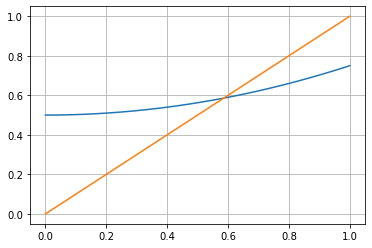

In [50]:
x = np.linspace(0, 1, 100)
plt.plot(x, F1(x))
plt.plot(x, x)  #Winkelhalbierende
plt.grid()

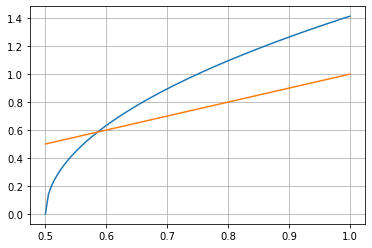

In [51]:
x = np.linspace(.5, 1, 100)
plt.plot(x, F2(x))
plt.plot(x, x)  #Winkelhalbierende
plt.grid()

### d)

In [32]:
def F1(x):
    return .25*(x**2 + 2.)

x0 = 1.
tol = 1e-4
x_fp = fpiterate(F1, x0, tol, print_info=True)

k =  1, x =  7.50000000e-01
k =  2, x =  6.40625000e-01
k =  3, x =  6.02600098e-01
k =  4, x =  5.90781719e-01
k =  5, x =  5.87255760e-01
k =  6, x =  5.86217332e-01
k =  7, x =  5.85912690e-01
k =  8, x =  5.85823420e-01
terminated after 8 iterations
x = 0.5858234200930438


Konvergenz gegen die gesuchte Nullstelle $x_* = 2 - \sqrt{2}$

In [46]:
def F2(x):
    return np.sqrt(4.*x - 2.)

x0 = .59
tol = 1e-4
x_fp = fpiterate(F2, x0, tol, print_info=True)

k =  1, x =  6.00000000e-01
k =  2, x =  6.32455532e-01
k =  3, x =  7.27888816e-01
k =  4, x =  9.54754033e-01
k =  5, x =  1.34870906e+00
k =  6, x =  1.84250814e+00
k =  7, x =  2.31733307e+00
k =  8, x =  2.69616993e+00
k =  9, x =  2.96389604e+00
k = 10, x =  3.13936047e+00
k = 11, x =  3.24922173e+00
k = 12, x =  3.31615544e+00
k = 13, x =  3.35628094e+00
k = 14, x =  3.38010707e+00
k = 15, x =  3.39417564e+00
k = 16, x =  3.40245537e+00
k = 17, x =  3.40731881e+00
k = 18, x =  3.41017232e+00
k = 19, x =  3.41184544e+00
k = 20, x =  3.41282606e+00
k = 21, x =  3.41340069e+00
k = 22, x =  3.41373736e+00
k = 23, x =  3.41393460e+00
k = 24, x =  3.41405014e+00
k = 25, x =  3.41411783e+00
terminated after 25 iterations
x = 3.414117832986327


Konvergenz gegen die andere Nullstelle $2 + \sqrt{2}$, egal wie nah man den Startwert $x_0$ an $x_* = 2 - \sqrt{2}$ wählt (abstoßender Fixpunkt)!